In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
warnings.filterwarnings("ignore")

In [4]:
import os

base_dir = os.getcwd()

In [5]:
df = pd.read_csv(f"{base_dir}/winequality-red.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

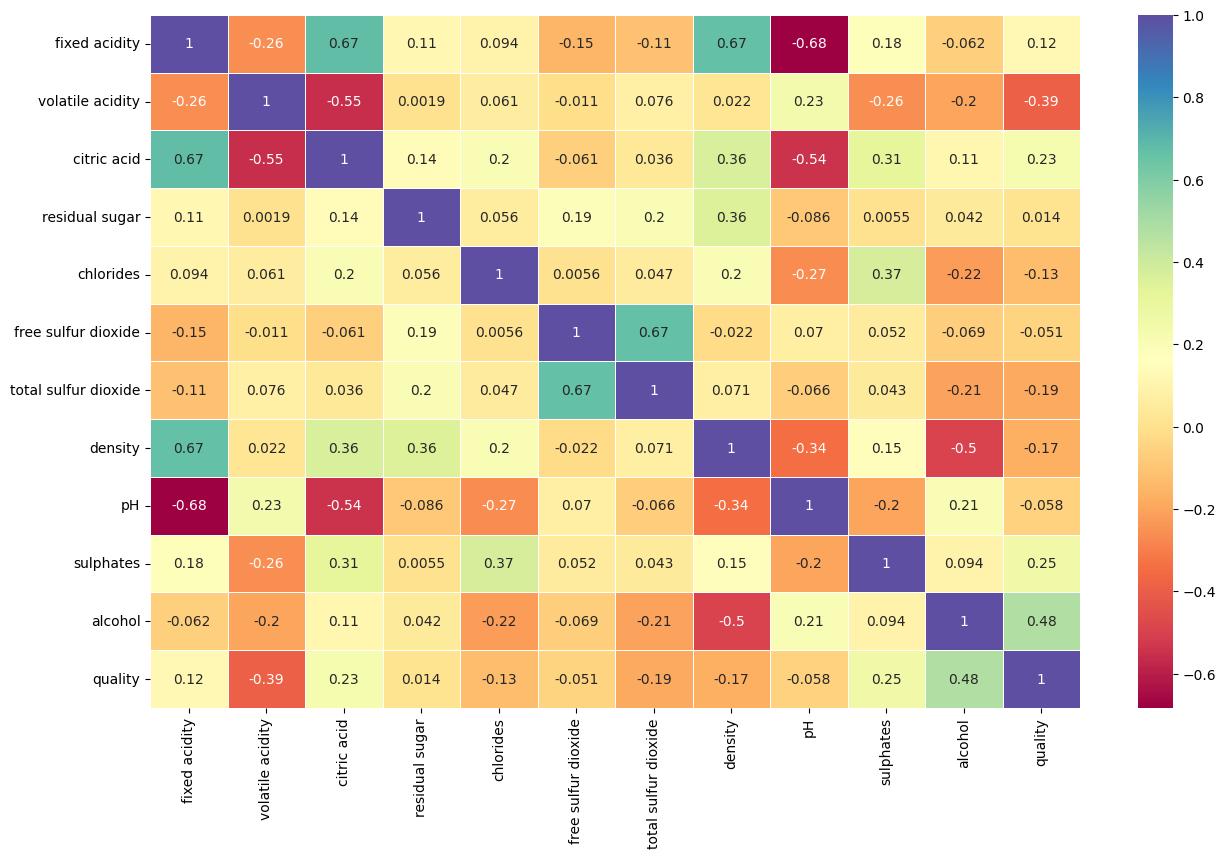

In [11]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", linewidths=0.5)

In [12]:
df.drop(["residual sugar", "free sulfur dioxide", "pH"], axis=1, inplace=True)

<AxesSubplot:>

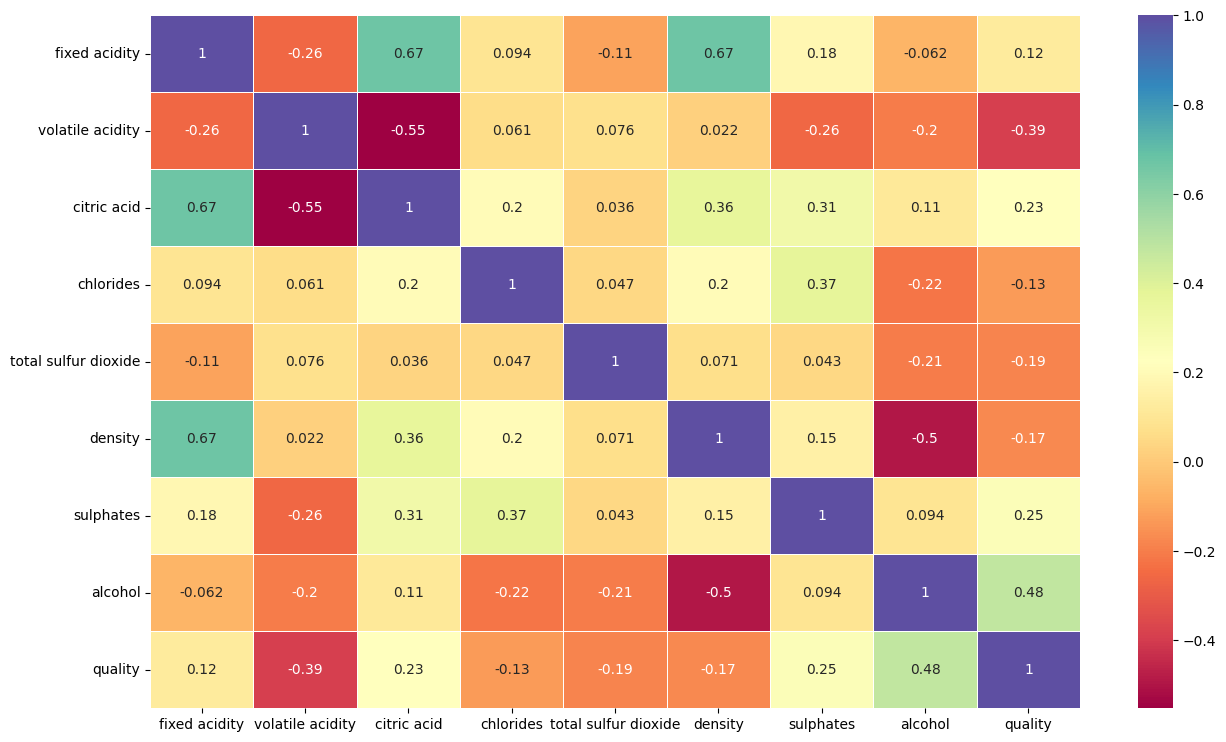

In [14]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", linewidths=0.5)

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [16]:
bins = (2, 6.5, 8)
group_names = ["bad", "good"]
df["quality"] = pd.cut(df["quality"], bins=bins, labels=group_names)

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,bad
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,bad
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,bad
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad


In [20]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [21]:
df = pd.get_dummies(df, prefix="quality", drop_first=True)

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality_good
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


<AxesSubplot:>

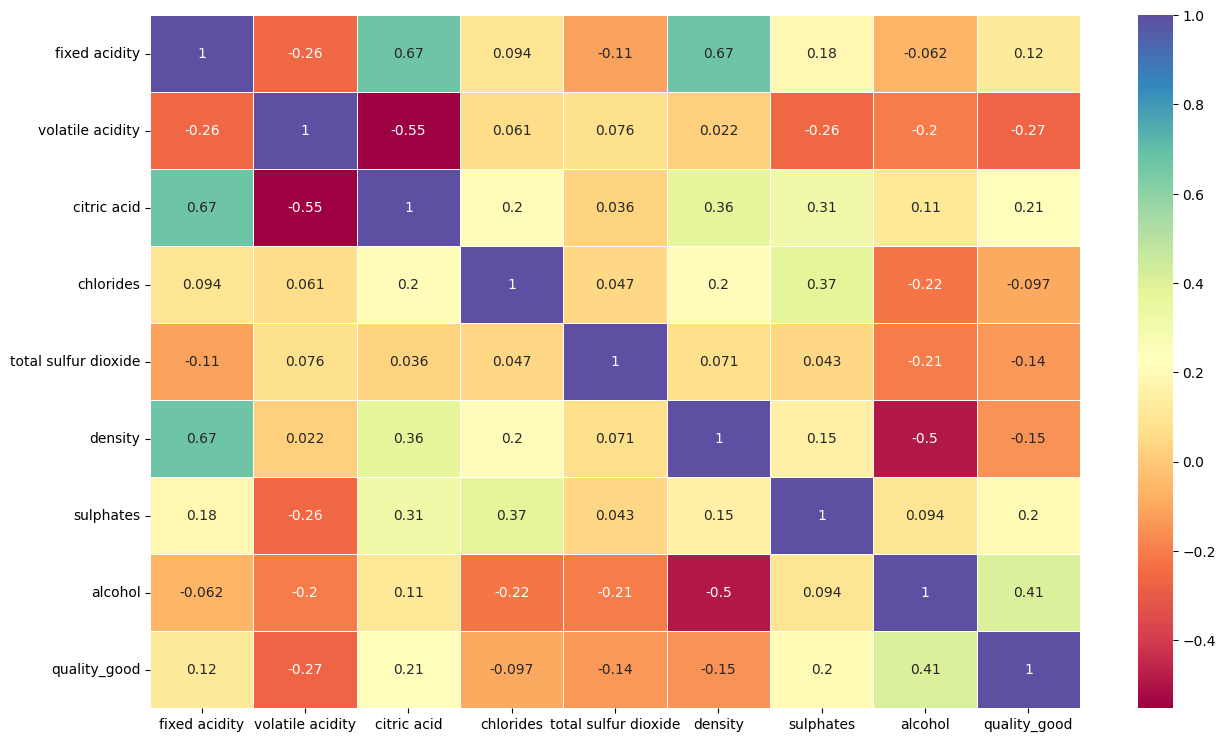

In [23]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", linewidths=0.5)

In [24]:
X = df.drop(["quality_good"], axis=1)
y = df["quality_good"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
from sklearn.svm import SVC

In [31]:
svc_model = SVC()

In [32]:
svc_model.fit(X_train, y_train)

SVC()

In [33]:
y_pred = svc_model.predict(X_test)

In [34]:
cv_scores = cross_val_score(estimator=svc_model, X=X_train, y=y_train, cv=10)
cv_scores.mean()

0.8897699311023622

In [35]:
accuracy_score(y_test, y_pred)

0.875

In [37]:
svc_model2 = SVC()
params = {'C': [0.1, 1, 10],
          'gamma': [1, 0.1, 0.01],
          'kernel': ['poly', 'rbf']}

In [38]:
svc_cv_model = GridSearchCV(estimator=svc_model2, param_grid=params, n_jobs=-1, cv=10)

In [40]:
svc_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf']})

In [41]:
svc_cv_model.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [42]:
svc_tune_model = SVC(C=1, gamma=1, kernel='rbf')


In [43]:
svc_tune_model.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [44]:
y_pred2 = svc_tune_model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred2)

0.89375

In [46]:
cv_scores = cross_val_score(estimator=svc_tune_model, X=X_train, y=y_train, cv=10)
cv_scores.mean()

0.8975885826771653